<a href="https://colab.research.google.com/github/almost232/summer-school/blob/main/Lab_1_Part_A_Scaffold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

| | |
|:---:|:---|
| <img src="https://drive.google.com/uc?export=view&id=1OaJVnbVa6RHE5tEl1e94s2B3L8BsO31K" width="100"/> |  <h1><b>Introduction to Language Models: Preprocessing, Modelling, and NLP</b>🙊</h1>|

---

**Instructor:**  
Pavlos Protopapas  

**Teaching Team:**  
Nawang Thinley Bhutia

In this notebook, we will go over some of the fundamental concepts in the realm of language models, including basic preprocessing techniques, basic sentiment analysis, modelling, and a few NLP tasks.

(You will learn about NLP tasks, and get hands-on experience with tokenization, cleaning, and normalization)


## Table of Contents

### **Part A**
1. Preprocessing Techniques
    - Loading your Data
    - Data Cleaning
    - Tokenization
    - Normalization
2. Simple Sentiment Analysis
    - Counting vs Context

3. Unigrams and Bigrams

    - DEMO: Calculate the frequency of unigrams and bigrams in a sample review.

### **Part B**
4. Embeddings
    - What are Embeddings?
    - Plotting Embeddings
    - Similar Words


  
5. Neural Networks for Language Modeling

    - Simple Neural Network Model: Using TensorFlow, create and train a model on the simple text to predict the sentiment.

    -Exercise: modify or optimize the model parameters to see the difference.


## **1. Preprocessing Techniques**

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import re
import pickle


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import bigrams
from nltk.probability import FreqDist


from prettytable import PrettyTable

### **Loading and exploring the data**

For your convenience, the data is already stored in the file _reviews.pkl_ which you can load read using the code below.

In [51]:
#gdown code to get pickle file from drive link
!gdown 1NtvaBOXc-dFlpUww6KgIP0Tq9jGD03ld

Downloading...
From: https://drive.google.com/uc?id=1NtvaBOXc-dFlpUww6KgIP0Tq9jGD03ld
To: /content/reviews.pkl
100% 10.6M/10.6M [00:00<00:00, 34.6MB/s]


In [52]:
with open('reviews.pkl', 'rb') as file:
    train, _ = pickle.load(file)

##### check the length and type of train
print(len(train)) #length
print(type(train)) #type

4000
<class 'list'>


Each review is stored in a list. You can explore the contents of each review.

In [53]:
train[16]

"I don't know why some guys from US, Georgia or even from Bulgaria have the courage to express feelings about something they don't understand at all. For those who did not watch this movie - watch it. Don't expect too much or don't put some frameworks just because this is Kosturica. Watch the movie without prejudice, try to understand the whole humor inside - people of Serbia DID actually getting married while Bil Clinton bomb their villages, gypsies in all Balkans are ALWAYS try to f*ck you up in any way they can, LOVE is always unexpected, pure and colorful, and Balkans are extremely creative. For those who claims this is a bad movie I can see only that the American's sh*t (like Meet Dave, Get Smart etc) are much much worse than a pure, frank Balkan humoristic love story movie as Promise me. The comment should be useful and on second place should represent the personal view of the writer. I think the movie is great and people watch it must give their respects to the director and stor

### ⏸ How many characters does the longest review has?

#### A. 4000
#### B. 10363
#### C. 8754

In [54]:
##check your answer here


In [55]:
### edTest(test_chow1) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = '___'

The dataset is organized such as the first 2000 reviews are positive, and the rest negative.

In [57]:
train_pos = train[:2000] #index first 2000
train_neg = train[-2000:] #inex last 2000

### **Data Cleaning**

Each review is in natural language, which means that it contains punctuation signs and uppercase letters. Because of the nature of the data, each review has HTML characters.

In order to analyze the information better, our data cleaning involves removing unwanted characters, punctuations, and stopwords from the text.

Let's use the following functions to do so.

#### **Transform**

In [58]:
def transform(review):
    # Lower case
    review = review.lower()

    # Remove HTML
    review = re.sub('<br /><br />', ' ', review)

    # Replace all none alphanumeric characters with spaces
    review = re.sub(r'[^a-zA-Z0\s]', ' ', review)

    return review

In [59]:
# Your code here
# HINT: use list comprehension to apply the transform function to each sentence
train_pos = [transform(string) for string in train_pos]
train_neg = [transform(string) for string in train_neg]


#### **Removing stop Words**

In [60]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# Remove stopwords

stop_words = set(stopwords.words('english'))
for sentence in train_pos:
  cleaned_tokens = [word for word in sentence.split() if word.lower() not in stop_words]

In [62]:
#print the cleane tokens to have a look
cleaned_tokens

['joking',
 'around',
 'ever',
 'ever',
 'chance',
 'see',
 'movie',
 'see',
 'need',
 'chop',
 'arm',
 'see',
 'see',
 'worth',
 'fatty',
 'drives',
 'bus',
 'unlike',
 'film',
 'ever',
 'seen',
 'takes',
 'trash',
 'cinema',
 'elevates',
 'work',
 'art',
 'contains',
 'poor',
 'shots',
 'idiotic',
 'characters',
 'bad',
 'dialogue',
 'strange',
 'acting',
 'cinematography',
 'belongs',
 'public',
 'access',
 'iowa',
 'actually',
 'succeeds',
 'goal',
 'film',
 'strives',
 'dumbest',
 'strangest',
 'inane',
 'movie',
 'ever',
 'seen',
 'boy',
 'ever',
 'succeed',
 'lay',
 'plot',
 'worry',
 'things',
 'filmmakers',
 'obviously',
 'really',
 'pay',
 'much',
 'attention',
 'entire',
 'film',
 'plot',
 'presented',
 'long',
 'piece',
 'text',
 'played',
 'opening',
 'credits',
 'event',
 'fdtb',
 'admirers',
 'call',
 'story',
 'bus',
 'tour',
 'chicago',
 'led',
 'satan',
 'see',
 'jesus',
 'town',
 'passengers',
 'bus',
 'supposed',
 'die',
 'souls',
 'would',
 'gone',
 'hell',
 'excep

### **Normalization**

Normalization includes techniques like stemming and lemmatization to reduce words to their base or root form.

#### Example: **Lemmatization**

In [63]:
# Download the WordNet corpus
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [64]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize tokens
lemmatized_tokens = [lemmatizer.lemmatize(token) for token in cleaned_tokens]
print(lemmatized_tokens)


['joking', 'around', 'ever', 'ever', 'chance', 'see', 'movie', 'see', 'need', 'chop', 'arm', 'see', 'see', 'worth', 'fatty', 'drive', 'bus', 'unlike', 'film', 'ever', 'seen', 'take', 'trash', 'cinema', 'elevates', 'work', 'art', 'contains', 'poor', 'shot', 'idiotic', 'character', 'bad', 'dialogue', 'strange', 'acting', 'cinematography', 'belongs', 'public', 'access', 'iowa', 'actually', 'succeeds', 'goal', 'film', 'strives', 'dumbest', 'strangest', 'inane', 'movie', 'ever', 'seen', 'boy', 'ever', 'succeed', 'lay', 'plot', 'worry', 'thing', 'filmmaker', 'obviously', 'really', 'pay', 'much', 'attention', 'entire', 'film', 'plot', 'presented', 'long', 'piece', 'text', 'played', 'opening', 'credit', 'event', 'fdtb', 'admirer', 'call', 'story', 'bus', 'tour', 'chicago', 'led', 'satan', 'see', 'jesus', 'town', 'passenger', 'bus', 'supposed', 'die', 'soul', 'would', 'gone', 'hell', 'except', 'jesus', 'town', 'lackey', 'hell', 'call', 'job', 'anger', 'satan', 'well', 'like', 'looking', 'like',

##### You may notice that some words did not get properly lemmatized. This can be addressed by adding a **POS (Part of Speech)** Tag

In [67]:
# Download the WordNet resource like tagger
# nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
# Create a new instance of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Sample words and their part-of-speech tags
tags = nltk.pos_tag(cleaned_tokens)

# Convert POS tags to formats compatible with WordNetLemmatizer
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return 'a'  # adjective
    elif treebank_tag.startswith('V'):
        return 'v'  # verb
    elif treebank_tag.startswith('N'):
        return 'n'  # noun
    elif treebank_tag.startswith('R'):
        return 'r'  # adverb
    else:
        return 'n'  # default to noun

# Lemmatizing words based on their POS tags
lemmatized_words = {word: lemmatizer.lemmatize(word, pos=get_wordnet_pos(tag)) for word, tag in tags}
print(lemmatized_words)


[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


{'joking': 'joke', 'around': 'around', 'ever': 'ever', 'chance': 'chance', 'see': 'see', 'movie': 'movie', 'need': 'need', 'chop': 'chop', 'arm': 'arm', 'worth': 'worth', 'fatty': 'fatty', 'drives': 'drive', 'bus': 'bus', 'unlike': 'unlike', 'film': 'film', 'seen': 'see', 'takes': 'take', 'trash': 'trash', 'cinema': 'cinema', 'elevates': 'elevate', 'work': 'work', 'art': 'art', 'contains': 'contains', 'poor': 'poor', 'shots': 'shot', 'idiotic': 'idiotic', 'characters': 'character', 'bad': 'bad', 'dialogue': 'dialogue', 'strange': 'strange', 'acting': 'act', 'cinematography': 'cinematography', 'belongs': 'belongs', 'public': 'public', 'access': 'access', 'iowa': 'iowa', 'actually': 'actually', 'succeeds': 'succeed', 'goal': 'goal', 'strives': 'strive', 'dumbest': 'dumb', 'strangest': 'strange', 'inane': 'inane', 'boy': 'boy', 'succeed': 'succeed', 'lay': 'lay', 'plot': 'plot', 'worry': 'worry', 'things': 'thing', 'filmmakers': 'filmmaker', 'obviously': 'obviously', 'really': 'really', '

In [68]:
# Create a PrettyTable
table = PrettyTable()
table.field_names = ["Original Word", "Stemmed Word"]

# Adding rows to the table
for original, lemma in lemmatized_words.items():
    table.add_row([original, lemma])

# Print the table
print(table)

+----------------+----------------+
| Original Word  |  Stemmed Word  |
+----------------+----------------+
|     joking     |      joke      |
|     around     |     around     |
|      ever      |      ever      |
|     chance     |     chance     |
|      see       |      see       |
|     movie      |     movie      |
|      need      |      need      |
|      chop      |      chop      |
|      arm       |      arm       |
|     worth      |     worth      |
|     fatty      |     fatty      |
|     drives     |     drive      |
|      bus       |      bus       |
|     unlike     |     unlike     |
|      film      |      film      |
|      seen      |      see       |
|     takes      |      take      |
|     trash      |     trash      |
|     cinema     |     cinema     |
|    elevates    |    elevate     |
|      work      |      work      |
|      art       |      art       |
|    contains    |    contains    |
|      poor      |      poor      |
|     shots      |      shot

#### **Stemming**


In [69]:
# Create an instance of the Porter Stemmer
stemmer = PorterStemmer()

# Applying stemming to each word
stemmed_words = {word: stemmer.stem(word) for word in cleaned_tokens}
print(stemmed_words)


{'joking': 'joke', 'around': 'around', 'ever': 'ever', 'chance': 'chanc', 'see': 'see', 'movie': 'movi', 'need': 'need', 'chop': 'chop', 'arm': 'arm', 'worth': 'worth', 'fatty': 'fatti', 'drives': 'drive', 'bus': 'bu', 'unlike': 'unlik', 'film': 'film', 'seen': 'seen', 'takes': 'take', 'trash': 'trash', 'cinema': 'cinema', 'elevates': 'elev', 'work': 'work', 'art': 'art', 'contains': 'contain', 'poor': 'poor', 'shots': 'shot', 'idiotic': 'idiot', 'characters': 'charact', 'bad': 'bad', 'dialogue': 'dialogu', 'strange': 'strang', 'acting': 'act', 'cinematography': 'cinematographi', 'belongs': 'belong', 'public': 'public', 'access': 'access', 'iowa': 'iowa', 'actually': 'actual', 'succeeds': 'succe', 'goal': 'goal', 'strives': 'strive', 'dumbest': 'dumbest', 'strangest': 'strangest', 'inane': 'inan', 'boy': 'boy', 'succeed': 'succeed', 'lay': 'lay', 'plot': 'plot', 'worry': 'worri', 'things': 'thing', 'filmmakers': 'filmmak', 'obviously': 'obvious', 'really': 'realli', 'pay': 'pay', 'much

---

## **2. Simple Sentiment Analysis**

In this exercise, you will look for keywords that you think represent a good movie and keywords that represent bad movies.

We expect that a _positive_ review will have more possitive than negative words.

To test the hypotesis, count the number of positive and negative words in each review of the training set, for each category.


In [70]:
# Your code here
pos_key = ['good']#, 'excelent', 'great', 'cool']
neg_key = ['bad']#, 'mediocre', 'regular', 'awful','terrible', 'boring', 'slow']

In [71]:
# This counts the words for the positive reviews

# Create a numpy array to store the scores
scores_pos = np.zeros((len(train_pos), 2))

# For each word in pos_key
for j in range(len(pos_key)):
    # For each review
    for i in range(scores_pos.shape[0]):
        # Add the number of times the word is found
        scores_pos[i,0]+=train_pos[i].count(pos_key[j])

# For each word in neg_key
for j in range(len(neg_key)):
    # For each review
    for i in range(scores_pos.shape[0]):
        # Add the number of times the word is found
        scores_pos[i,1]+=train_pos[i].count(neg_key[j])


Using the same logic as above, compute the scores for the negative reviews next:

In [74]:
# Your code here
scores_neg = np.zeros((len(train_neg), 2))

# For each word in pos_key
for j in range(len(neg_key)):
    # For each review
    for i in range(scores_neg.shape[0]):
        # Add the number of times the word is found
        scores_neg[i,0]+=train_neg[i].count(neg_key[j])

# For each word in pos_key
for j in range(len(neg_key)):
    # For each review
    for i in range(scores_pos.shape[0]):
        # Add the number of times the word is found
        scores_pos[i,1]+=train_pos[i].count(pos_key[j])

### ⏸ What is the average number of appearances of the word **good** in the positive reviews?

#### A. 0.30
#### B. 0.45
#### C. 0.67

In [77]:
##check your answer here
##check your answer here
print(scores_pos[:,0].mean())

0.6705


In [76]:
### edTest(test_chow2) ###
# Submit an answer choice as a string below (eg. if you choose option A, put 'A')
answer1 = 'C'

In order to compare the success of your strategy, you must define a criteria.

The simplest one to check if a review is good is to look if the number of positive words occurs more than negative words. For a negative review, the number of negative words should be higher than the positive ones.

How many good reviews are classified correctly according to this score? How many negative ones are classified correctly?

Remember that you are working with **2000** examples of each category.

In [78]:
# Your code here
b = scores_pos[:,0]>scores_pos[:,1]
print('The number of positive reviews is',b.sum())

b = scores_neg[:,0]<scores_neg[:,1]
print('The number of negative reviews is',b.sum())

The number of positive reviews is 0
The number of negative reviews is 0


Create **histograms** to analyze the score distribution.

Do the results coincide with your expectations?

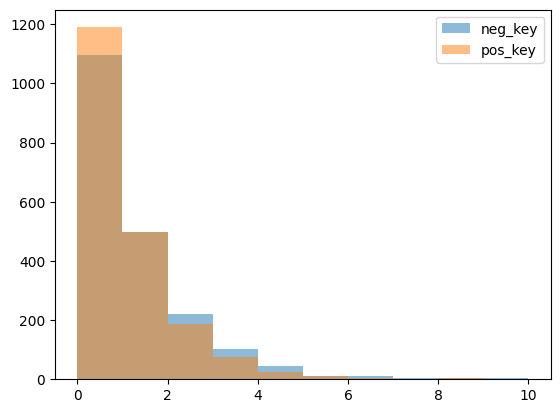

In [79]:
# Your code here
plt.hist(scores_pos[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='neg_key')
plt.hist(scores_pos[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='pos_key')
plt.legend(loc=0)
plt.show()

Generate the same histograms for the negative reviews.

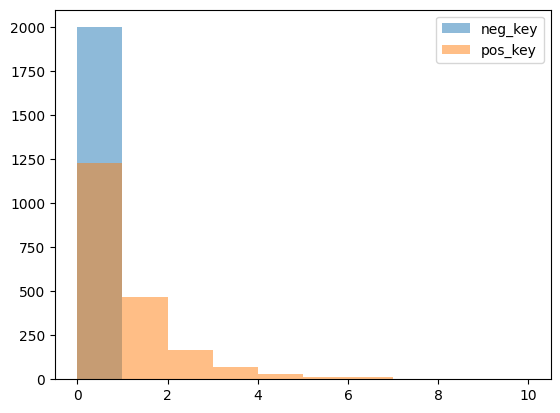

In [80]:
plt.hist(scores_neg[:,1], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='neg_key')
plt.hist(scores_neg[:,0], bins=[0,1,2,3,4,5,6,7,8,9,10], alpha=0.5, label='pos_key')
plt.legend(loc=0)
plt.show()

In general, the presence of _bad_ words do not represent a bad movie. For example in the following review, we can see many _bad_ words that in the context are used to describe something positive.

In [81]:
train[17]

"Or at least one of the best. I think this is a very fun and very cool game for the N64. Bowser is up to his usual shenanigans (yeah it's a dumb word but the only one I can think of) and Mario must stop him again. This game is very fun to play, and contains lots of nostalgia to me. The only bad thing about it is the graphics, which are awful to today's standards, but everything else is pretty good (especially the little mini-games you can unlock) It's the second best N64 game (the first best is Conker's Bad Fur Day) that I recommend to any Mario fan, or any fan of platform games. It beats out mediocre Super Mario Sunshine any day.<br /><br />9/10 or: A"

You can see that the words _bad_, _awful_ and _mediocre_ are in the review. But they are used to compare it to another title.

Moreover, if you look closely, you will see that this is not a movie, but a game, which might have different keywords that describe its behavior.

### ⏸ In your own words, How important is the context here?

#### ##add your answer here

The determination of a word's sentiment often depends on the context.


## 3. **Unigrams and Bigrams (DEMO)**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


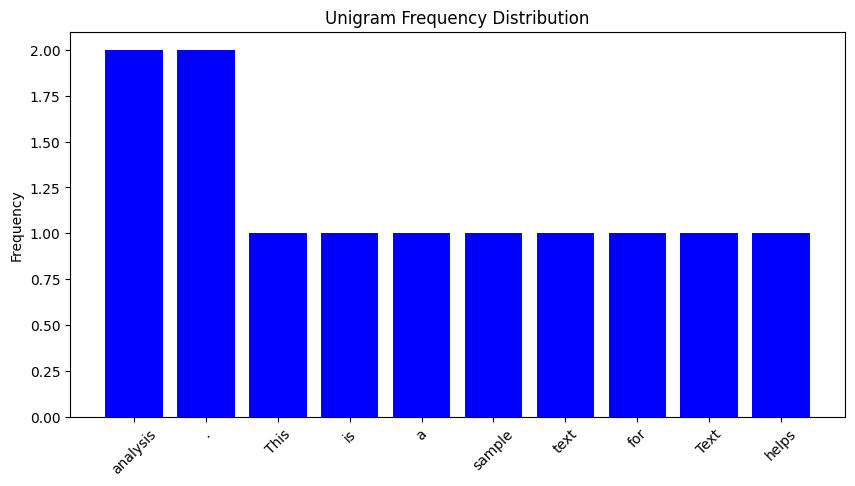

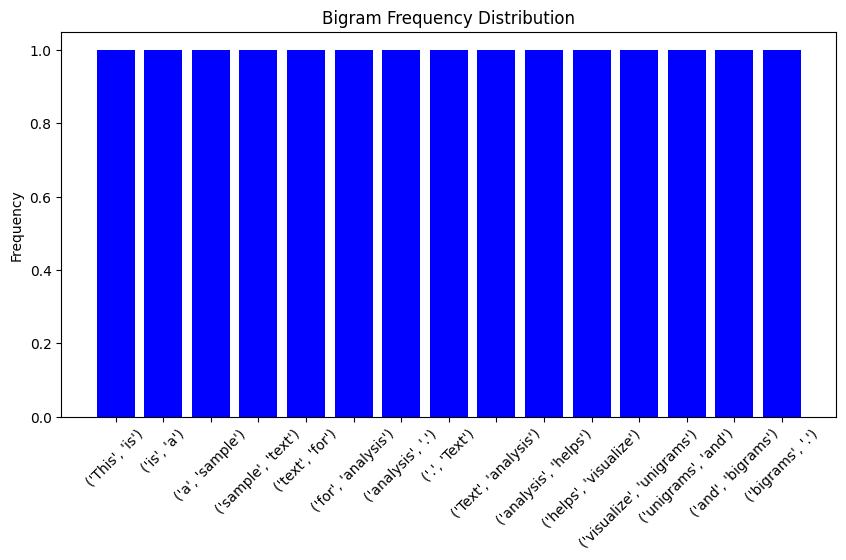

In [84]:
# Sample text
text = "This is a sample text for analysis. Text analysis helps visualize unigrams and bigrams."
import nltk
nltk.download('punkt_tab')
# Tokenizing the text
tokens = nltk.word_tokenize(text)

# Calculate Unigrams frequency
unigram_freq = FreqDist(tokens)

# Calculate Bigrams frequency
bigrams_tokens = list(bigrams(tokens))
bigram_freq = FreqDist(bigrams_tokens)

# Function to plot frequency distributions
def plot_freq_dist(freq_dist, title="Frequency Distribution", num=10):
    most_common = freq_dist.most_common(num)
    # Convert bigram tuples to strings explicitly
    words = [str(item[0]) for item in most_common]  # Ensure words are strings
    counts = [item[1] for item in most_common]
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='b')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Frequency')
    plt.show()

# Visualize Unigrams
plot_freq_dist(unigram_freq, title="Unigram Frequency Distribution")

# Visualize Bigrams
# For bigrams, need to convert tuple to string for plotting
bigram_labels = [' '.join(bigram) for bigram in bigram_freq]
plot_freq_dist(bigram_freq, title="Bigram Frequency Distribution", num=len(bigram_labels))